<a href="https://colab.research.google.com/github/pchernic/Classification-/blob/main/%5BAlgorithms_for_Imbalanced_data%5D_Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn


A telecom company that provides services is concerned about reducing its customer retention rate. Therefore, the CRM manager has hired you to develop a predictive model for customers who are likely to stop using the company's services. The goal is to identify as many customers as possible who might churn because the company wants to retain as many customers as possible with their services active. To execute this project, the company has provided you with a historical database of 7043 customers with 21 columns listed below.

| Column           | Description                                             |
| ---------------- | ------------------------------------------------------- |
| customerID       | Customer ID                                            |
| gender           | Customer's gender                                      |
| SeniorCitizen    | Whether the customer is a senior citizen or not         |
| Partner          | Whether the customer is part of a partnership or not    |
| Dependents       | Whether the customer has dependents or not              |
| tenure           | Number of months the customer has been with the company |
| PhoneService     | Whether the customer has phone service or not           |
| MultipleLines    | Whether the customer has multiple lines or not          |
| InternetService  | Customer's internet service provider                    |
| OnlineSecurity   | Whether the customer has online security or not         |
| OnlineBackup     | Whether the customer has online backup or not           |
| DeviceProtection | Whether the customer has device protection or not       |
| TechSupport      | Whether the customer has tech support or not            |
| StreamingTV      | Whether the customer has streaming TV or not            |
| StreamingMovies  | Whether the customer has streaming movies or not        |
| Contract         | Customer's contract duration                            |
| PaperlessBilling | Whether the customer receives paperless billing or not  |
| PaymentMethod    | Customer's payment method                               |
| MonthlyCharges   | Monthly charges the customer incurs                     |
| TotalCharges     | Total charges incurred by the customer                  |
| Churn            | Indicator if the customer has churned (1) or not (0)    |

 dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Methodology

![Figura-3-Fases-do-Modelo-CRISP-DM_Q640[1].jpg](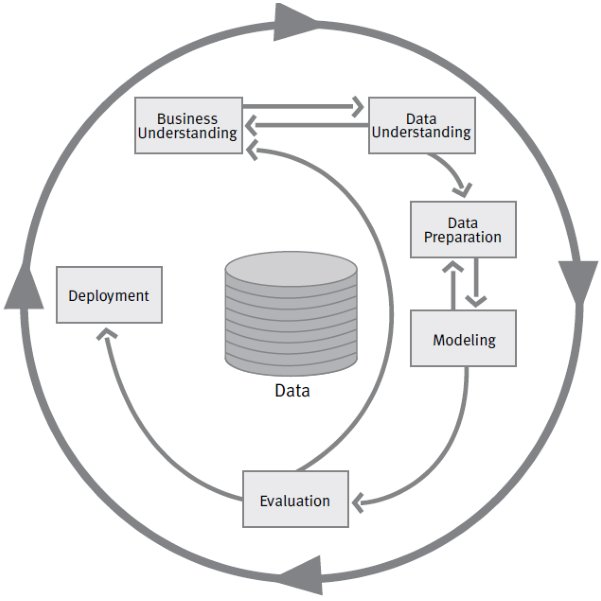)

# 0.0 Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# 1.0 Business Understanding

# 2.0 Data Understanding

## 2.1 Data Ingestion

In [ ]:
df = pd.read_csv('telco-customer-churn.csv', keep_default_na=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.2 Data Size

In [ ]:
df.shape

(7043, 21)

## 2.3 Date Types

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip())

## 2.4 NAN Values

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['TotalCharges']==0].shape #amount values = 0

(0, 21)

In [ ]:
df[df['TotalCharges'].isna()].shape # missing values

(11, 21)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0.0) # filling with zeros

## 2.5 Duplicated Values

In [ ]:
df[df.duplicated()].shape[0]

0

## 2.6 Class label distribution

In [ ]:
df['Churn'].value_counts(normalize=True) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## 2.7 Data Description

### 2.7.1 Numerical columns

In [ ]:
df.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


# 3.0 Data Preparation

In [ ]:
SEED=42

## 3.1 Train-test split

In [ ]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=.80,
                                                    shuffle=True,
                                                    random_state=SEED,
                                                    stratify=y)

## 3.2 Preprocessing Pipeline

1. One-hot encoding
2. StandardScaler

In [ ]:
columns_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='first'), make_column_selector(dtype_include='object')),
        ('sscaler', StandardScaler(), make_column_selector(dtype_include='float64'))
     ],
    sparse_threshold=0,
    remainder='passthrough')

# 4.0 Modeling

## 4.1 With Imbalanced data

In [ ]:
pipe = Pipeline([
    ('ct', columns_transformer),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 88.3 ms, sys: 1.88 ms, total: 90.1 ms
Wall time: 91.3 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('lr', LogisticRegression(solver='liblinear'))])

## 4.2 Oversampling

### 4.2.1 RandomOverSampler

In [ ]:
pipe_imb_ros = Pipeline([
    ('ct', columns_transformer),
    ('ros', RandomOverSampler(random_state=SEED)),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 104 ms, sys: 4.96 ms, total: 109 ms
Wall time: 110 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('smt', RandomOverSampler(random_state=42)),
                ('lr', LogisticRegression(solver='liblinear'))])

### 4.2.2 SMOTE

In [ ]:
pipe_imb_smt = Pipeline([
    ('ct', columns_transformer),
    ('smt', SMOTE(random_state=SEED)),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 197 ms, sys: 155 ms, total: 352 ms
Wall time: 233 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('smt', SMOTE(random_state=42)),
                ('lr', LogisticRegression(solver='liblinear'))])

### 4.2.3 ADASYN

In [ ]:
pipe_imb_ads = Pipeline([
    ('ct', columns_transformer),
    ('ads', ADASYN(random_state=SEED)),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 473 ms, sys: 284 ms, total: 756 ms
Wall time: 547 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('smt', ADASYN(random_state=42)),
                ('lr', LogisticRegression(solver='liblinear'))])

## 4.3 Undersampling

### 4.3.1 RandomUnderSampler

In [ ]:
pipe_imb_rus = Pipeline([
    ('ct', columns_transformer),
    ('rus', RandomUnderSampler(random_state=SEED)),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 70 ms, sys: 1.71 ms, total: 71.7 ms
Wall time: 74.3 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('smt', RandomUnderSampler(random_state=42)),
                ('lr', LogisticRegression(solver='liblinear'))])

### 4.3.2 NearMiss

In [ ]:
pipe_imb_nmi = Pipeline([
    ('ct', columns_transformer),
    ('nmi', NearMiss()),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 226 ms, sys: 103 ms, total: 329 ms
Wall time: 219 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('smt', NearMiss()),
                ('lr', LogisticRegression(solver='liblinear'))])

### 4.3.3 CondensedNearestNeighbour

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pipe_imb_cnn = Pipeline([
    ('ct', columns_transformer),
    ('cnn', CondensedNearestNeighbour(random_state=SEED)),
    ('lr', LogisticRegression(solver='liblinear'))
])

CPU times: user 6min 32s, sys: 2min 40s, total: 9min 12s
Wall time: 5min 52s


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b310>),
                                                 ('sscaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f646024b3d0>)])),
                ('smt', CondensedNearestNeighbour(random_state=42)),
                ('lr', LogisticRegression(solver='liblinear'))])

# 5.0 Evaluation

In [ ]:
l_results_train = []

## 5.1 Stratified $k$-fold

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

## 5.2 Sem rebalanceamento

In [ ]:
%%time

results = cross_validate(pipe, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['LR', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

F1 TRAIN: 0.6015 (0.005433)
F1 TEST : 0.594 (0.03465)


## 5.3 Oversampling

### 5.3.1 RandomOverSampler

In [ ]:
%%time

results = cross_validate(pipe_imb_ros, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['ROS', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

F1 TRAIN: 0.633 (0.003296)
F1 TEST : 0.6289 (0.02475)


### 5.3.2 SMOTE

In [ ]:
%%time

results = cross_validate(pipe_imb_smt, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['SMT', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

F1 TRAIN: 0.6342 (0.002689)
F1 TEST : 0.6306 (0.02707)


### 5.3.3 ADASYN

In [ ]:
%%time

results = cross_validate(pipe_imb_ads, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['ADS', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

F1 TRAIN: 0.6253 (0.003029)
F1 TEST : 0.6197 (0.01984)


## 5.4 Undersampling

### 5.4.1 RandomUnderSampler

In [ ]:
%%time

results = cross_validate(pipe_imb_rus, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['RUS', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

F1 TRAIN: 0.6341 (0.002272)
F1 TEST : 0.6284 (0.027)


### 5.4.2 NearMiss

In [ ]:
%%time

results = cross_validate(pipe_imb_nmi, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['NMI', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

F1 TRAIN: 0.5057 (0.005337)
F1 TEST : 0.5024 (0.02363)


### 5.4.3 CondensedNearestNeighbour

In [ ]:
%%time

results = cross_validate(pipe_imb_cnn, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, return_train_score=True)

train_scores = results['train_score']
test_scores = results['test_score']

print(f'F1 TRAIN: {np.mean(train_scores):.4} ({np.std(train_scores):.4})')
print(f'F1 TEST : {np.mean(test_scores):.4} ({np.std(test_scores):.4})')

l_results_train.append(['CNN', np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)])

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


F1 TRAIN: 0.6369 (0.005105)
F1 TEST : 0.6315 (0.02537)


## 5.5 Consolidating Results

In [ ]:
df_results = pd.DataFrame(l_results_train, columns=['algorithm', 'train F1 mean', 'train F1 std', 'test F1 mean', 'test F1 std']).sort_values(by=['test F1 mean'], ascending=False)
df_results['train_test_diff'] = df_results['train F1 mean']-df_results['test F1 mean']

In [ ]:
df_results

,algorithm,train F1 mean,train F1 std,test F1 mean,test F1 std,train_test_diff
6,CNN,0.636885,0.005105,0.631500,0.025375,0.005385
2,SMT,0.634222,0.002689,0.630649,0.027070,0.003573
1,ROS,0.632954,0.003296,0.628869,0.024751,0.004085
4,RUS,0.634068,0.002272,0.628350,0.027001,0.005717
3,ADS,0.625253,0.003029,0.619722,0.019841,0.005531
0,LR,0.601546,0.005433,0.594046,0.034650,0.007500
5,NMI,0.505711,0.005337,0.502406,0.023630,0.003305


# 6.0 Deployment

In [ ]:
from sklearn.metrics import f1_score

pipe_imb_cnn.fit(X_train, y_train)

y_preds = pipe_imb_cnn.predict(X_test)
f1_score(y_true=y_test, y_pred=y_preds)

0.6178128523111612